In [1]:
import numpy as np
from scipy.stats import linregress
from scipy.optimize import minimize
import pandas as pd
import os
from collections import Counter
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso
# These lines do some fancy plotting magics
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [58]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://en.wikipedia.org/wiki/List_of_United_States_presidential_election_results_by_state'
response = requests.get(url)

soup = BeautifulSoup(response.content, 'html.parser')

tables = soup.find_all('table')

dataframes = []
for table in tables:
    rows = table.find_all('tr')
    headers = [header.text.strip() for header in rows[0].find_all('th')]
    data = []
    for row in rows[1:]:
        data.append([cell.text.strip() for cell in row.find_all('td')])
    df = pd.DataFrame(data)
    dataframes.append(df)

for df in dataframes:
    print(df.shape)
presid = dataframes[0]
presid = presid.drop(labels = [25, 52], axis= 0)
presid


(53, 59)
(10, 59)
(18, 59)
(13, 55)
(14, 43)
(51, 14)
(7, 1)


,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,,,,,,,,,DR,Jackson,...,R,R,R,R,R,R,R,R,R,R
1,,,,,,,,,,,...,R,R,R,R,R,R,R,R,R,R
2,,,,,,,,,,,...,R,R,R,D,R,R,R,R,R,D
3,,,,,,,,,,,...,R,R,D,D,R,R,R,R,R,R
4,,,,,,,,,,,...,R,R,D,D,D,D,D,D,D,D
5,,,,,,,,,,,...,R,R,D,R,R,R,D,D,D,D
6,GW,GW,F,F,F,F,F,F,DR,Adams,...,R,R,D,D,D,D,D,D,D,D
7,GW,GW,F,F,F,F,F,F,DR,Crawford,...,R,R,D,D,D,D,D,D,D,D
8,,,,,,,,,,,...,D,D,D,D,D,D,D,D,D,D
9,,,,,,,,,,,...,R,R,R,D,R,R,D,D,R,R


In [79]:
presid = presid.set_axis(["Alabama",
"Alaska",
"Arizona",
"Arkansas",
"California",
"Colorado",
"Connecticut",
"Delaware",
"D.C.",
"Florida",
"Georgia",
"Hawaii",
"Idaho",
"Illinois",
"Indiana",
"Iowa",
"Kansas",
"Kentucky",
"Louisiana",
"Maine",
"Maryland",
"Massachusetts",
"Michigan",
"Minnesota",
"Mississippi",
"Missouri",
"Montana",
"Nebraska",
"Nevada",
"New Hampshire",
"New Jersey",
"New Mexico",
"New York",
"North Carolina",
"North Dakota",
"Ohio",
"Oklahoma",
"Oregon",
"Pennsylvania",
"Rhode Island",
"South Carolina",
"South Dakota",
"Tennessee",
"Texas",
"Utah",
"Vermont",
"Virginia",
"Washington",
"West Virginia",
"Wisconsin",
"Wyoming"], axis= 0)
years = [1789, 1792]
for i in range(57):
    years.append(years[i + 1] + 4)
years
presid = presid.set_axis(years, axis=1)
final_pres = presid[years[-13:]]

In [100]:
# q2 cont. 
final_pres = final_pres.replace("R", 1)
final_pres = final_pres.replace("D", 0)
final_pres.shape


(51, 13)

In [99]:
rep_states = []
for index, row in final_pres.iterrows():
    if sum(row) == 13:
        rep_states.append(index)
print(rep_states)

['Alaska', 'Idaho', 'Kansas', 'Nebraska', 'North Dakota', 'Oklahoma', 'South Dakota', 'Utah', 'Wyoming']


In [101]:
dem_states = []
for index, row in final_pres.iterrows():
    if sum(row) == 0:
        dem_states.append(index)
print(dem_states)

['D.C.']


In [106]:
il_votes = sum(final_pres.iloc[13])
same_il = []
for index, row in final_pres.iterrows():
    if sum(row) == il_votes:
        same_il.append(index)
print(same_il)

['California', 'Connecticut', 'Illinois', 'Maine', 'New Jersey', 'Pennsylvania', 'Vermont']


These findings are quite interesting. As we can see more states voted all Republican
than states who voted for all Democratic over this time period. And 6 states 
voted the exact same amount of times of Republican as Illinois. These states 
can often vary and are considered swing and power states in the system. 

In [107]:
# q4
from sklearn.cluster import KMeans
K_range = range(1, 11)

# Create an empty list to store the total within-cluster variance for each value of K
total_wcv = []

# Loop through each value of K and calculate the K-means clustering
for K in K_range:
    kmeans = KMeans(n_clusters=K)
    kmeans.fit(final_pres)
    
    # Calculate the total within-cluster variance (WCV)
    wcv = kmeans.inertia_
    total_wcv.append(wcv)

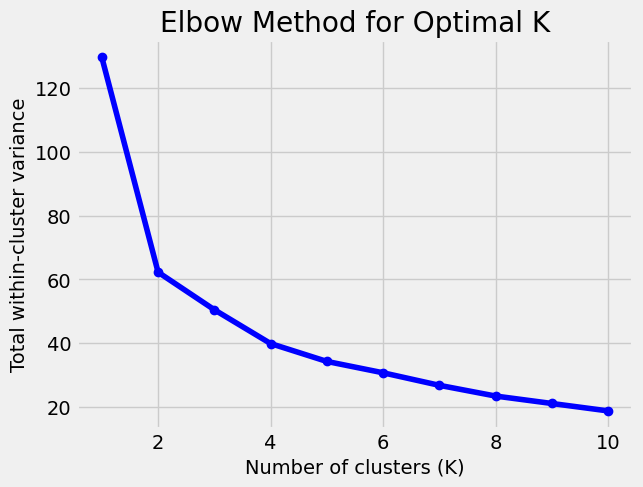

In [108]:
plt.plot(K_range, total_wcv, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Total within-cluster variance')
plt.title('Elbow Method for Optimal K')
plt.show()

Part 4:

The K that I chose was 4 because intuitively, this is the point at which the plot
has the most elbow like pattern. 

The four clusters could be clusters indicating groups of states that all voted 
republican, democratic, the same as other states, and half and half. 



/var/folders/c1/5zzf4b396wdgc4t2xxg1dqw00000gn/T/ipykernel_26587/1645634001.py:20: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  correlation_linkage = linkage(corr_dist_condensed, method='ward')


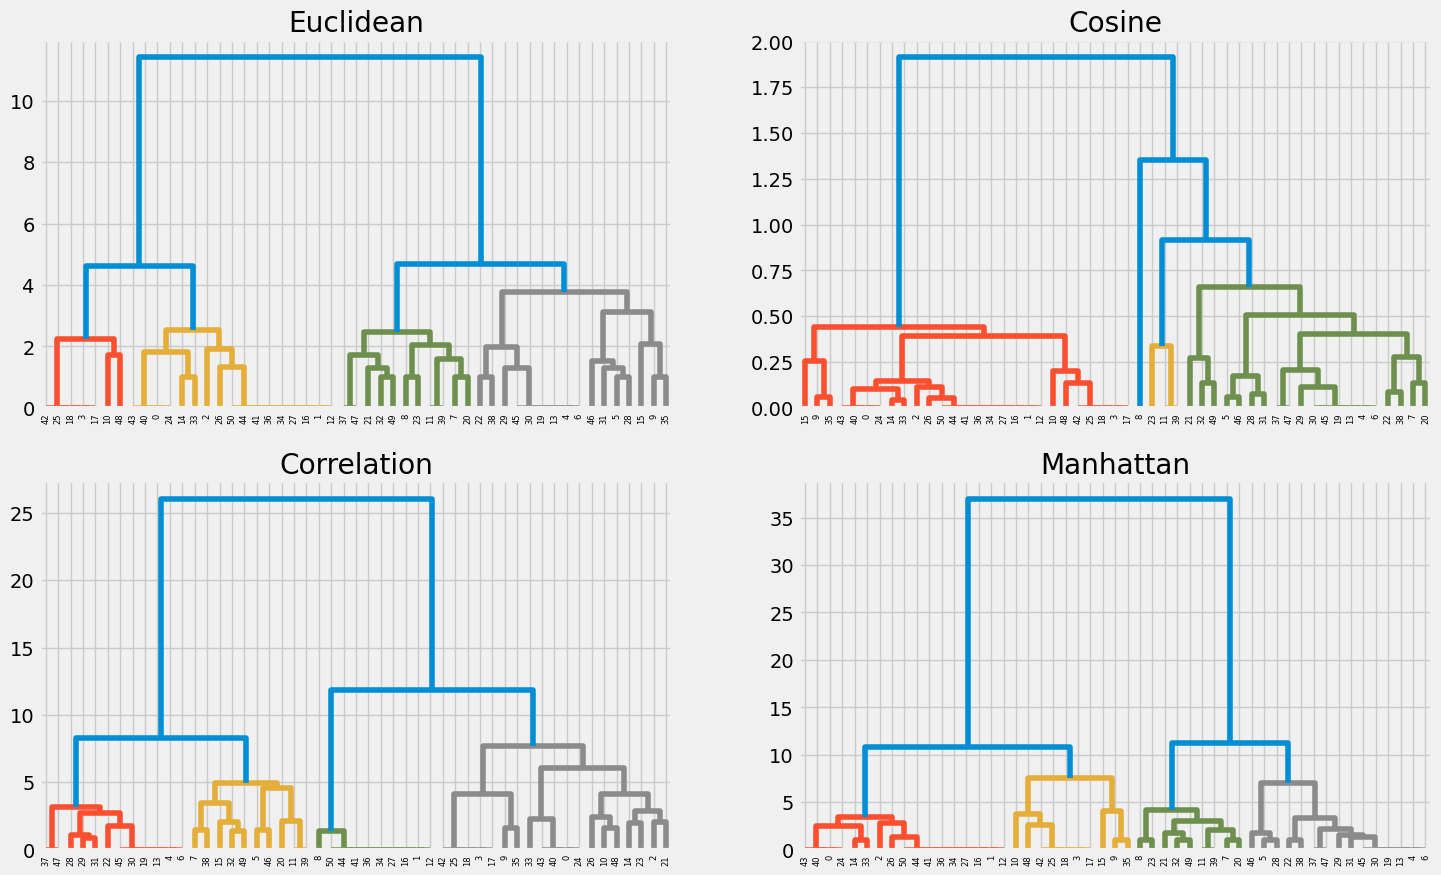

In [136]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics.pairwise import euclidean_distances, cosine_distances, manhattan_distances
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist, squareform, correlation

scaler = StandardScaler()
X_std = scaler.fit_transform(final_pres)

correlation_dist = pdist(X_std, metric='correlation')
euclidean_dist = euclidean_distances(final_pres)
cosine_dist = cosine_distances(final_pres)
manhattan_dist = manhattan_distances(final_pres)

euclidean_dist_condensed = squareform(euclidean_dist)
cosine_dist_condensed = squareform(cosine_dist)
manhattan_dist_condensed = squareform(manhattan_dist)
corr_dist_condensed = squareform(correlation_dist)

correlation_linkage = linkage(corr_dist_condensed, method='ward')
euclidean_linkage = linkage(euclidean_dist_condensed, method='ward')
cosine_linkage = linkage(cosine_dist_condensed, method='ward')
manhattan_linkage = linkage(manhattan_dist_condensed, method='ward')

plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
dendrogram(euclidean_linkage, color_threshold=euclidean_linkage[-3, 2])
plt.title('Euclidean')

plt.subplot(2, 2, 2)
dendrogram(cosine_linkage, color_threshold=cosine_linkage[-3, 2])
plt.title('Cosine')

plt.subplot(2, 2, 3)
dendrogram(correlation_linkage, color_threshold=correlation_linkage[-3, 2])
plt.title('Correlation')

plt.subplot(2, 2, 4)
dendrogram(manhattan_linkage, color_threshold=manhattan_linkage[-3, 2])
plt.title('Manhattan')

plt.show()
